# Hypothesis Testing in Healthcare: Drug Safety

Usually when a pharmaceutical company has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they almost always present the dataset to another organization that focuses primarily on drug safety.


This project uses a clinical-style drug safety dataset derived from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. The dataset simulates patient-level information typically collected during a controlled clinical trial evaluating the safety of a drug compared to a placebo (non-active treatment).

The original dataset included detailed records of multiple adverse effects such as:

Headache

Abdominal pain

Dyspepsia

Diarrhea

Nausea

In addition, it contained demographic information, vital signs, and laboratory measurements. The study design reflects a 2:1 ratio of patients receiving the drug versus placebo, which is common in clinical research to gather more safety data on the investigational treatment.

## Dataset Modification for This Project

For the purpose of this safety analysis, the dataset was simplified and restructured to focus specifically on adverse event occurrence and burden:

Individual adverse effect categories were consolidated into a single binary variable indicating whether a participant experienced any adverse effect

A numerical variable was created to capture the total number of adverse effects reported per individual

This restructuring makes the dataset suitable for statistical safety comparisons between treatment groups.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

## Variables in the Modified Dataset

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The number of weeks of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells( billion cells/L) |
|`rbc` | The count of red blood cells (million cells per microliter (mcL) of blood) |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |


## Purpose of Using This Dataset

This dataset was used to perform a statistical drug safety evaluation, similar to analyses conducted during:

Clinical trial safety monitoring.

Regulatory drug approval processes.

Pharmacovigilance and post-marketing surveillance.

The goal was to determine whether the investigational drug shows any increased safety risk compared to placebo based on adverse event occurrence, adverse effect burden, and laboratory indicators.

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).



In [196]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

In [197]:
# Loading the dataset
drug_safety =pd.read_csv("/Users/macbookpro/Documents/Projects/python/Clinical Drug safety/drug_safety.csv")

In [198]:
# Checking the first 10 rows
drug_safety.head(10)

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
5,62,male,Drug,20,NaN,NaN,Yes,1
6,62,male,Drug,4,6.9,5.2,Yes,1
7,62,male,Drug,8,7.1,5.0,Yes,1
8,69,male,Drug,0,8.8,5.1,No,0
9,69,male,Drug,1,NaN,NaN,No,0


In [199]:
# checking the last 10 rows
drug_safety.tail(10)

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
16093,68,male,Drug,1,NaN,NaN,Yes,1
16094,68,male,Drug,2,NaN,NaN,No,0
16095,78,male,Placebo,0,7.2,5.0,No,0
16096,78,male,Placebo,1,NaN,NaN,Yes,1
16097,78,male,Placebo,12,6.5,4.9,No,0
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0
16102,78,male,Placebo,8,7.8,4.8,No,0


In [200]:
# checking the basic information
drug_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


In [201]:
# checking the count of rows and columns in our dataset
drug_safety.shape

(16103, 8)

In [202]:
# Let's check for missing values
drug_safety.isna().sum()

age                   0
sex                   0
trx                   0
week                  0
wbc                6975
rbc                6976
adverse_effects       0
num_effects           0
dtype: int64

Columns wbc and rbc contain missing values. The best way to address this challenge for this dataset is to impute mean values of each respective column

In [203]:
# Fixing the missing values

drug_safety["wbc"]=drug_safety["wbc"].fillna(drug_safety["wbc"].mean())
drug_safety["rbc"]=drug_safety["rbc"].fillna(drug_safety["rbc"].mean())

In [204]:
# Let's validate the outcome

drug_safety.isnull().sum()

age                0
sex                0
trx                0
week               0
wbc                0
rbc                0
adverse_effects    0
num_effects        0
dtype: int64

In [205]:
# Checking for the lowest and highest value in the age column

drug_safety["age"].min()

39

In [206]:
drug_safety["age"].max()

84

In [207]:
# Checking for unique values in the sex column

drug_safety["sex"].unique()

array(['male', 'female'], dtype=object)

In [208]:
# Standardizing sex values to proper case (e.g., 'male' → 'Male')

drug_safety["sex"]=drug_safety["sex"].str.title()
drug_safety["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [209]:
# Let's check for unique values in the trx column

drug_safety["trx"].unique()

array(['Drug', 'Placebo'], dtype=object)

In [210]:
#Let's check for the lowest and highest value in the week column

drug_safety["week"].min()

0

In [211]:
drug_safety["week"].max()

20

<Axes: xlabel='week'>

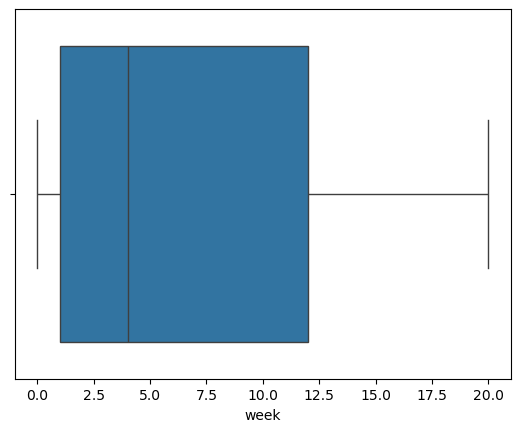

In [212]:
# Let's check for outliers

sns.boxplot(x=drug_safety["week"])

In [213]:
# Let's look for lowest and highest values in wbc column

drug_safety["wbc"].min()

1.79999995

In [214]:
drug_safety["wbc"].max()

26.5

<Axes: xlabel='wbc'>

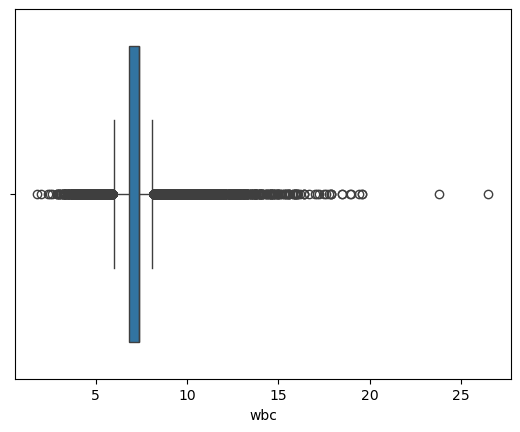

In [215]:
#Let's visualize for outliers

sns.boxplot(x=drug_safety["wbc"])

We have to distinguish between biological reality and data entry errors. Some of these values in wbc column are extreme, but they are clinically plausible. They aren't "impossible"

In [216]:
# Let's check for minimum and maximum values in the rbc column
drug_safety["rbc"].min()

2.0999999

In [217]:
drug_safety["rbc"].max()

7.5999999

<Axes: xlabel='rbc'>

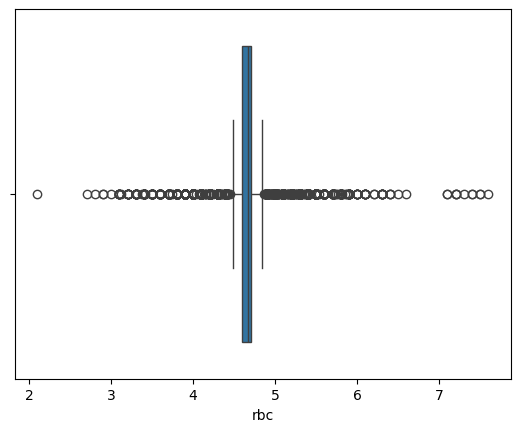

In [218]:
#Let's visualize for outliers

sns.boxplot(x=drug_safety["rbc"])

In [219]:
# Let's check for unique values in the adverse_effects column

drug_safety["adverse_effects"].unique()

array(['No', 'Yes'], dtype=object)

In [220]:
# Let's check for uniques values in the num_effects column

drug_safety["num_effects"].unique()

array([0, 1, 3, 2])

<Axes: xlabel='num_effects', ylabel='Count'>

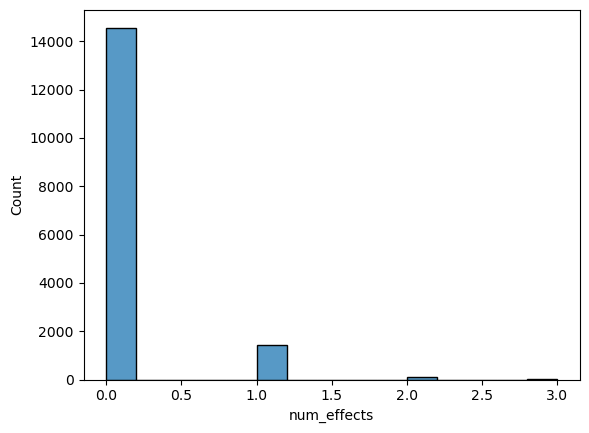

In [221]:
#Checking the distribution of number of effects

sns.histplot(data=drug_safety, x="num_effects")

Looks like a large number of participants in this clinical trial did not experience adverse_effects

In [222]:
#let's explore the adverse effects for each treatment type

adv_eff_by_trx=drug_safety.groupby("trx")["adverse_effects"].value_counts()
print(adv_eff_by_trx)

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: count, dtype: int64


In [223]:
#Let's compute the total participants per group

adv_eff_by_trx_totals=adv_eff_by_trx.groupby("trx").sum()
print(adv_eff_by_trx_totals)

trx
Drug       10727
Placebo     5376
Name: count, dtype: int64


These totals are needed to compute proportions.

In [224]:
#Categorizing participants who experienced adverse effects from both Drug and Placebo

trx_eff_drug_yes = drug_safety[drug_safety["adverse_effects"] == "Yes"].groupby("trx")["adverse_effects"].count()
print(trx_eff_drug_yes)

trx
Drug       1024
Placebo     512
Name: adverse_effects, dtype: int64


In [225]:
# Let's create an array for the total number of rows in each group

n= [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]
print(n)

[np.int64(10727), np.int64(5376)]


This creates sample sizes

In [226]:
#Let's perform a two_sided z-test on the two proportion

two_sample_results = proportions_ztest(trx_eff_drug_yes, n)
print(two_sample_results)

(np.float64(0.0452182684494942), np.float64(0.9639333330262475))


In [227]:
#let's store the p-value, which tells us if the difference is statistically significant.

two_sample_p_value= two_sample_results[1]
print("The p-value is:",round(two_sample_p_value,2))

The p-value is: 0.96


In [228]:
#let's see if Drug patients were more likely to have multiple adverse effects rather than just one or none.

num_effects_groups = pingouin.chi2_independence(data=drug_safety, x="num_effects", y="trx")

Even if overall adverse effect rates are similar, the severity burden might differ for these two treatment groups.

In [229]:
num_effects_p_value= num_effects_groups[2]["pval"][0]
print(num_effects_p_value)

0.6150123339426765


<Axes: xlabel='age', ylabel='Count'>

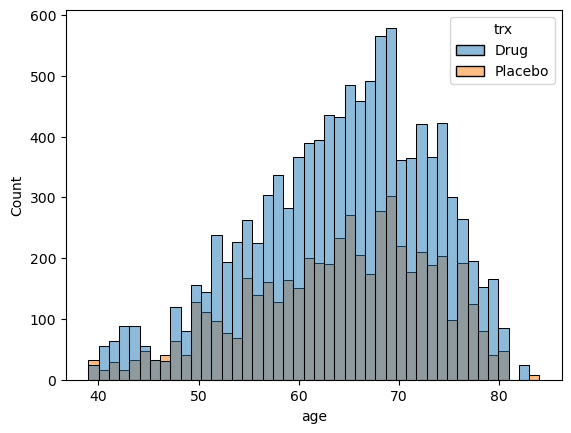

In [230]:
#Let's visualize age distribution to see if one group is older

sns.histplot(data=drug_safety, x="age", hue="trx")

Age affects adverse effect risk. Older patients often experience more adverse events.

In [231]:
#Let's leverage the Shapiro-Wilk test to check if age is normally distributed. This determines which statistical test is appropriate

normality= pingouin.normality(data=drug_safety, dv="age",group="trx",method="shapiro", alpha=0.05)
print(normality)

                W          pval  normal
trx                                    
Drug     0.976763  2.117243e-38   False
Placebo  0.975600  2.236347e-29   False


The results show that Age is not normally distributed. Therefore we use the Mann–Whitney U test (non-parametric alternative to t-test).

What it asks:

Are the ages in the Drug group statistically different from those in the Placebo group?

In [232]:
age_drug= drug_safety.loc[drug_safety["trx"]=="Drug", "age"]
age_placebo=drug_safety.loc[drug_safety["trx"]=="Placebo", "age"]

In [233]:
age_group_effects= pingouin.mwu(age_drug, age_placebo)
print(age_group_effects)

          U-val alternative     p-val      RBC      CLES
MWU  29149339.5   two-sided  0.256963  0.01093  0.505465


In [234]:
age_group_effects_p_value= age_group_effects["p-val"]
print(age_group_effects_p_value)

MWU    0.256963
Name: p-val, dtype: float64




## Final Summary: What Was Actually Accomplished

## 1. Did the Drug Cause More Adverse Effects Than Placebo?

Test used: Two-Proportion Z-Test

P-value: 0.964

#### What this means statistically

A p-value of 0.964 is much greater than 0.05

Therefore, we fail to reject the null hypothesis

#### What this means clinically

There is no statistical evidence that the drug causes a higher proportion of patients to experience side effects compared to placebo.

#### In simple terms:

Patients taking the drug had side effects at about the same rate as those taking placebo.

This suggests the drug does not increase overall risk of experiencing any adverse effect.

## 2. Did Patients on the Drug Experience More Side Effects Per Person?

Test used: Chi-Square Test of Independence

P-value: 0.615

#### What this means statistically

0.615 > 0.05

The number of side effects is not associated with treatment type

#### What this means clinically

Even among people who had side effects, those on the drug did not experience more number of adverse effects than placebo patients.

#### In simple terms:

The burden of side effects per patient is similar in both groups.

So not only are overall adverse effect rates similar — severity/frequency patterns are also similar.

## 3. Were the Drug and Placebo Groups Similar in Age?

Test used: Mann–Whitney U Test

P-value: 0.257

#### What this means statistically

0.257 > 0.05

No significant age difference between groups

#### Why this is important

Age influences:

Drug metabolism

Adverse effect risk

Lab values

#### Because the age distribution is similar:

The comparison between Drug and Placebo is fair and not biased by age.


Therefore the drug demonstrates a safety profile comparable to placebo.
There is no statistical evidence of increased overall adverse effects or greater adverse effect burden among patients receiving the drug. Additionally, treatment groups were demographically comparable, supporting the validity of the safety analysis.

### What This Means for a Real Drug Study

If this were a real clinical trial:

The drug would be considered not to have major safety red flags

Regulators would view this as supportive safety evidence

Further evaluation would focus more on effectiveness, since safety appears acceptable